# Thinking1	XGBoost与GBDT的区别是什么？

   1）目标函数：XGBoost损失函数是用泰勒展开式展开的，同时用到了一阶导和二阶导，可以加快优化速度，正则项加入树树模型的复杂度，避免过拟    合，因此泛化性能优于GBDT。


　　2）支持的分类器：GBDT只支持CART作为基分类器，XGBoost不仅支持CART作为基分类器，还支持线性分类器。

　　3）XGBoost引进了特征子采样，像RandomForest那样，这种方法既能降低过拟合，还能减少计算。

　　4）XGBoost在寻找最佳分割点时，采用一种近似贪心算法

　　5）XGBoost支持并行处理，GBDT 是串行处理。


#  Thinking2	举一个你之前做过的预测例子（用的什么模型，解决什么问题，比如我用LR模型，对员工离职进行了预测，效果如何... 请分享到课程微信群中）
答：GBDT回归模型，预测设备运行是否正常，预测效果较好，预测的结果与实际值偏差很小，因为数据集不大，预测时间也能满足.


# Thinking3	请你思考，在你的工作中，需要构建哪些特征（比如用户画像，item特征...），这些特征都包括哪些维度（鼓励分享到微信群中，进行交流）

答：构建设备特征，维度包括温度、压力、振动、流量、转速、电压、电流、负荷等


# Action1	"男女声音识别
数据集：voice.csv
3168个录制的声音样本（来自男性和女性演讲者），采集的频率范围是0hz-280hz，已经对数据进行了预处理
一共有21个属性值，请判断该声音是男还是女？
使用Accuracy作为评价标准
"


In [1]:
import pandas as pd

In [27]:
data = pd.read_csv('./voice.csv')

In [28]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [30]:
# 将标签列值为male 值替换为1，female值替换为0
data["label"] = data["label"].map({"female":0, "male":1})
print(data["label"] )

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64


In [31]:
# 数据统计信息
print(data.describe())

          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  ...  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  ...   
mean      0.084309     3.140168    36.568461     0.895127     0.408216  ...   
std       0.042783     4.240529   134.928661     0.044980     0.177521  ...   
min       0.01455

In [33]:
 #统计某一列中各个元素值出现的次数
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(data['meanfreq'].value_counts()) 

0.212190    2
0.213732    2
0.228903    1
0.100399    1
0.160155    1
0.233744    1
0.190971    1
0.156606    1
0.132855    1
0.177723    1
0.126626    1
0.188222    1
0.165462    1
0.183552    1
0.161114    1
0.111154    1
0.140717    1
0.196425    1
0.190402    1
0.187009    1
0.176320    1
0.166764    1
0.146211    1
0.178197    1
0.099854    1
0.179496    1
0.192547    1
0.182312    1
0.151463    1
0.207604    1
0.166974    1
0.206534    1
0.126735    1
0.229129    1
0.140651    1
0.160514    1
0.229041    1
0.196023    1
0.179407    1
0.184309    1
0.149953    1
0.194414    1
0.197205    1
0.175181    1
0.134962    1
0.183481    1
0.219691    1
0.171756    1
0.220802    1
0.139583    1
0.238917    1
0.195201    1
0.196092    1
0.138446    1
0.164784    1
0.181525    1
0.122626    1
0.112153    1
0.089693    1
0.199041    1
0.174035    1
0.201433    1
0.188611    1
0.199583    1
0.236703    1
0.227946    1
0.191854    1
0.189913    1
0.121837    1
0.198039    1
0.188815    1
0.1551

In [56]:
# 绘制箱线图
# 数据准备 
columns = list(data.columns.values)
print(columns)
features =  columns[0:-1]
print(features)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


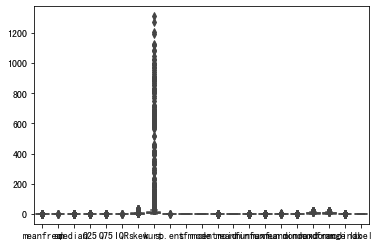

In [36]:
# 用Seaborn画箱线图
import seaborn as sns
df = pd.DataFrame(data, columns=columns)
sns.boxplot(data=df)
plt.show()

In [42]:
# 异常值处理
def box_plot_outliers(data_ser, box_scale):
    """
    利用箱线图去除异常值
    :param data_ser: 接收 pandas.Series 数据格式
    :param box_scale: 箱线图尺度，
    :return:
    """
    iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
    val_low = data_ser.quantile(0.25) - iqr
    val_up = data_ser.quantile(0.75) + iqr
    rule_low = (data_ser < val_low)
    rule_up = (data_ser > val_up)
    return rule_low, rule_up, val_low, val_up

In [76]:
# 获取异常值的行索引
indexes = set()

# 正常值的范围【Q1-1.5*IQR, Q3+1.5*IQR】,找出异常值行索引
for feature in features:
#for feature in ["meanfreq"]:
    
    # 获取特征的 是否超过下限  是否超过上限 下限值 上限值
    rule_low, rule_up, val_low, val_up = box_plot_outliers(data[feature],1.5)
    
    # 低于下限制的行索引
    indexes_low = list(rule_low[rule_low.values == True].index)
    #print(indexes)
    
    # 低于下限的用下限值代替
    data[feature].iloc[indexes_low] = val_low
    
    # 高于上限值的行索引
    indexes_up = list(rule_up[rule_up.values == True].index)
    
    # 高于上限的用上限值代替
    data[feature].iloc[indexes_up] = val_up

In [77]:
print(data)

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
0     0.110436  0.064241  0.108054  0.015071  0.156376  0.075122  4.854882   
1     0.110436  0.067310  0.108054  0.019414  0.156376  0.073252  4.854882   
2     0.110436  0.083829  0.108054  0.013808  0.156376  0.123207  4.854882   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374  1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325  1.101174   
5     0.132786  0.079557  0.119090  0.067958  0.209592  0.141634  1.932562   
6     0.150762  0.074463  0.160106  0.092899  0.205718  0.112819  1.530643   
7     0.160514  0.076767  0.144337  0.110532  0.231962  0.121430  1.397156   
8     0.142239  0.078018  0.138587  0.088206  0.208587  0.120381  1.099746   
9     0.134329  0.080350  0.121451  0.075580  0.201957  0.126377  1.190368   
10    0.157021  0.071943  0.168160  0.101430  0.216740  0.115310  0.979442   
11    0.138551  0.077054  0.127527  0.087314  0.202739  0.115426

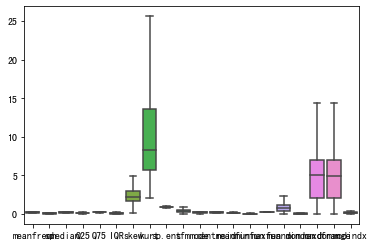

In [78]:
# 预处理后用Seaborn画箱线图
df_prossesing = pd.DataFrame(data, columns=features)
sns.boxplot(data=df_prossesing)
plt.show()

In [88]:
# 特征数据标准化 没有标准化 得分为0.91
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data[features] = ss.fit_transform(data[features])

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features],data['label'], test_size=0.2, random_state=42)

In [95]:
from sklearn.linear_model.logistic import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("测试集得分",lr.score(X_test,y_test))
print("总体得分",lr.score(data[features],data['label']))

测试集得分 0.9794952681388013
总体得分 0.9750631313131313


In [104]:
# 使用xgboostig 分类
import xgboost as xgb
param = {'boosting_type':'gbdt',
                         'objective' : 'binary:logistic', #
                         'eval_metric' : 'auc',
                         'eta' : 0.01,
                         'max_depth' : 8,
                         'colsample_bytree':0.8,
                         'subsample': 0.9,
                         'subsample_freq': 8,
                         'alpha': 0.6,
                         'lambda': 0,
        }

# 数据转化为xgb输入格式
train_data = xgb.DMatrix(X_train, label=y_train)
valid_data = xgb.DMatrix(X_test, label=y_test)
test_data = xgb.DMatrix(data[features])

In [109]:
model = xgb.train(param, train_data, evals=[(train_data, 'train'), (valid_data, 'valid')], num_boost_round = 10000, early_stopping_rounds=200, verbose_eval=25)
predict = model.predict(test_data)
data['predict']=predict
print(predict)
# 转化为二分类输出
data['predict']=data['predict'].map(lambda x:1 if x>=0.5 else 0)
#print(data['predict'])
#test[['Attrition']].to_csv('submit_xgb.csv')

# 整体评分
from sklearn.metrics import accuracy_score
acc = accuracy_score(data['label'],data['predict'])
print("模型得分：",acc)


[08:53:03] WARNING: ../src/learner.cc:516: 
Parameters: { boosting_type, subsample_freq } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.99529	valid-auc:0.99003
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[25]	train-auc:0.99936	valid-auc:0.99656
[50]	train-auc:0.99958	valid-auc:0.99536
[75]	train-auc:0.99967	valid-auc:0.99539
[100]	train-auc:0.99973	valid-auc:0.99540
[125]	train-auc:0.99977	valid-auc:0.99694
[150]	train-auc:0.99982	valid-auc:0.99716
[175]	train-auc:0.99986	valid-auc:0.99723
[200]	train-auc:0.99990	valid-auc:0.99742
[225]	train-auc:0.99992	valid-auc:0.99745
[250]	train-auc:0.99994	valid-auc:0.99762
[275]	train-auc:0.99995	valid-auc:0.99762
[300]	tr